### Logistic Regression realization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn as nn
# plt.rcParams['figure.figsize'] = (8, 8)

In [4]:
def accuracy(a, b):
    return (a == b).float().mean()

def plot_decision_regions(x, y, model):
    with torch.no_grad():
        colors = [
            '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
            '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
            '#bcbd22', '#17becf']

        plt.scatter(x[:, 0][y < 0.5], x[:, 1][y < 0.5], s=10)
        plt.scatter(x[:, 0][y > 0.5], x[:, 1][y > 0.5], s=10)
        
        a = torch.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 100)
        b = torch.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 100)
        A, B = torch.meshgrid(a, b)
        points = torch.stack([A, B], 2).view(100 * 100, 2)
        y_hat = model(points).view(100, 100)

        plt.contourf(a, b, y_hat, alpha=0.25, colors=colors, levels=torch.arange(y_hat.max() + 2) - 0.5)    
        plt.show()
        
def plot_loss_surface(x, y, weights, b):
    with torch.no_grad():
        lim = 2.
        
        min = weights.min(0)[0]
        max = weights.max(0)[0]
        
        w1 = np.linspace(min[0] - lim, max[0] + lim)
        w2 = np.linspace(min[1] - lim, max[1] + lim)
        W1, W2 = np.meshgrid(w1, w2)
        Z = np.zeros((w1.size, w2.size))

        for i in range(Z.shape[0]):
            for j in range(Z.shape[1]):
                model = LogReg()
                model.w.data = torch.tensor([W1[i, j], W2[i, j]])
                model.b.data = torch.tensor(b)
                y_hat = model(x)
                Z[i, j] = bce(y, y_hat)

        plt.contourf(W1, W2, Z, cmap=cm.coolwarm, levels=100)
        plt.scatter(weights[:, 0], weights[:, 1], marker='x', c='white')
        plt.show()
        
def load_data():
    data = pd.read_csv('./Iris.csv')
    data = data.iloc[(data['Species'] != 'Iris-setosa').values]
    unique = ['Iris-versicolor', 'Iris-virginica']
    x = data[['PetalLengthCm', 'PetalWidthCm']].values.astype(np.float32)
    y = (data['Species'] == 'Iris-virginica').values.astype(np.float32)

    x = (x - x.mean(0)) / x.std(0)

    rng = np.random.RandomState(42)
    i = rng.permutation(x.shape[0])
    x = x[i]
    y = y[i]

    x_train = x[:60]
    y_train = y[:60]
    x_test = x[60:]
    y_test = y[60:]

    x_train = torch.tensor(x_train)
    y_train = torch.tensor(y_train)

    x_test = torch.tensor(x_test)
    y_test = torch.tensor(y_test)
    
    return (x_train, y_train), (x_test, y_test)

In [5]:
# binary crossentropy

def bce(y, y_hat, eps=1e-7):
    return (- (y * torch.log(y_hat + eps) + (1 - y) * torch.log( 1 - y_hat + eps)).mean())

In [6]:
# load data

(x_train, y_train),(x_test, y_test) = load_data()

In [7]:
def sigmoid(x):
    return 1./(1 + torch.exp(-x))

In [8]:
# Implement logistic regression through the LogReg class and train it using gradient descent (use PyTorch)

class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.w = nn.Parameter(torch.tensor([0.,0.]))
        self.b = nn.Parameter(torch.tensor(0.))
        
    def forward(self, x):
        return sigmoid(x.matmul(self.w) + self.b)

In [9]:
model = LogReg()

epoch 0, train loss 0.69, train acc 0.62, test loss 0.69, test acc 0.32


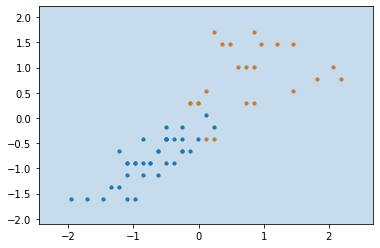

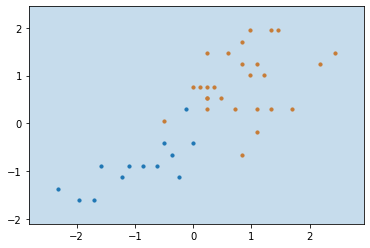

c:\users\natar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


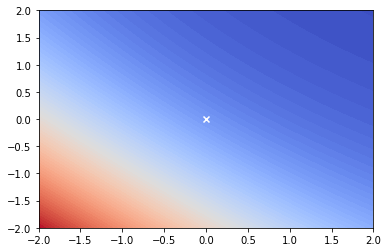

epoch 10, train loss 0.48, train acc 0.93, test loss 0.48, test acc 0.95


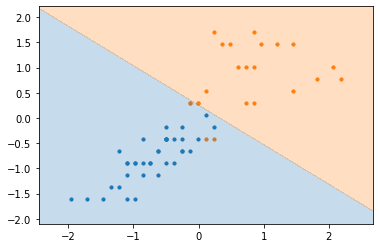

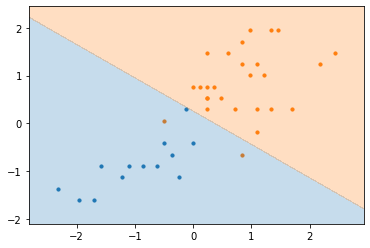

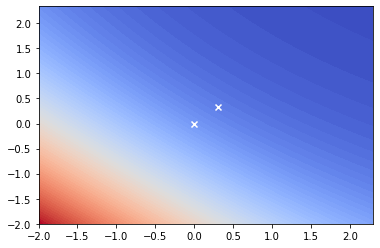

epoch 20, train loss 0.38, train acc 0.93, test loss 0.38, test acc 0.95


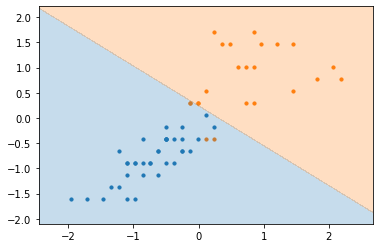

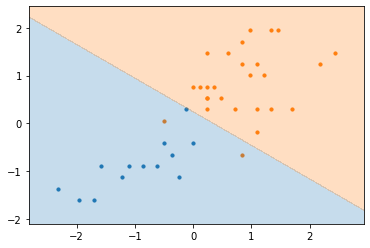

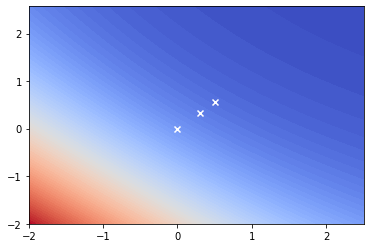

epoch 30, train loss 0.33, train acc 0.93, test loss 0.33, test acc 0.95


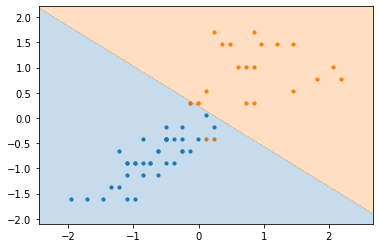

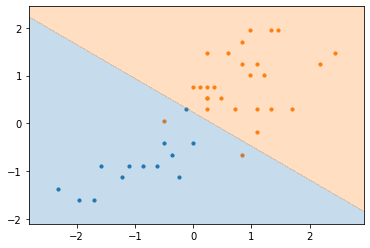

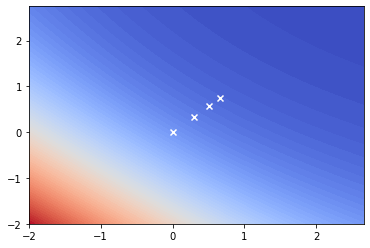

epoch 40, train loss 0.29, train acc 0.93, test loss 0.29, test acc 0.95


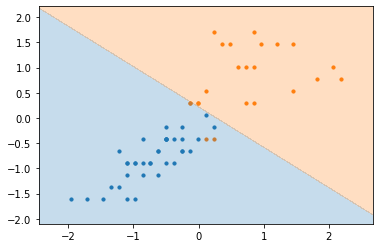

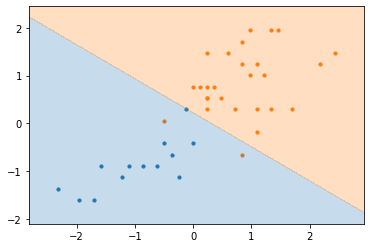

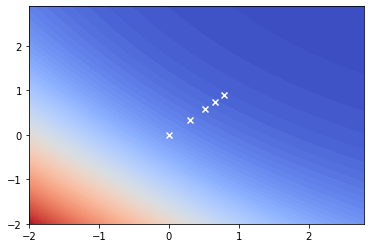

epoch 50, train loss 0.27, train acc 0.93, test loss 0.27, test acc 0.95


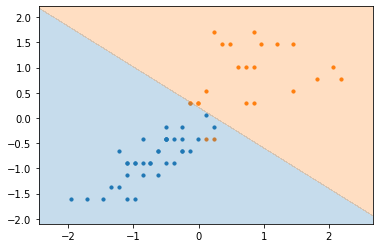

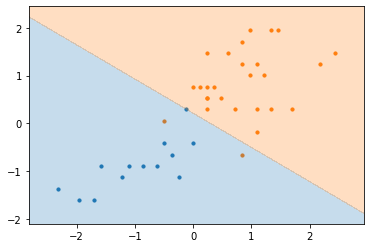

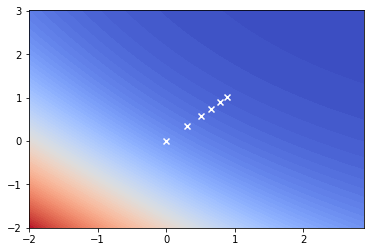

epoch 60, train loss 0.25, train acc 0.93, test loss 0.25, test acc 0.95


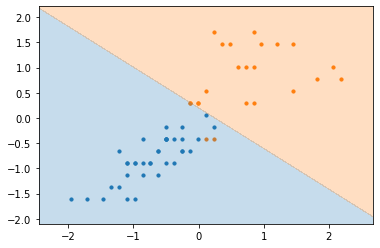

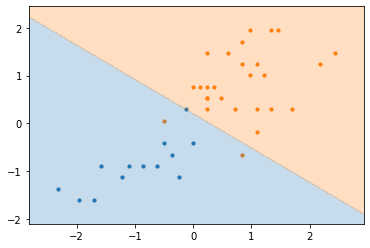

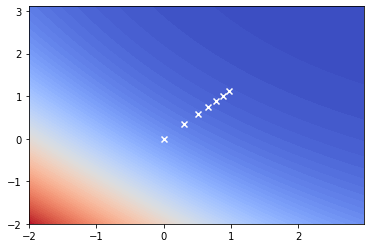

epoch 70, train loss 0.23, train acc 0.93, test loss 0.24, test acc 0.95


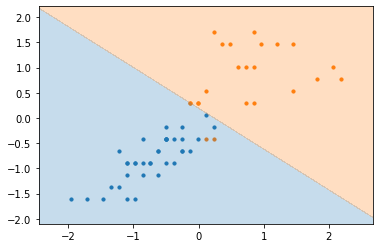

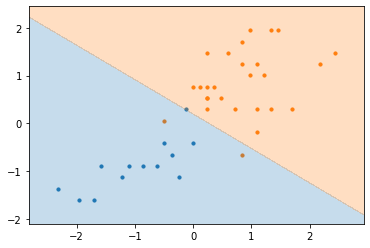

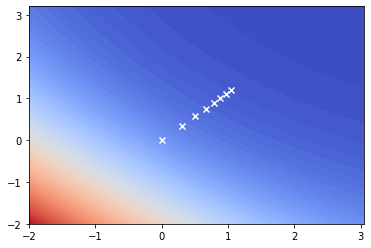

epoch 80, train loss 0.22, train acc 0.93, test loss 0.22, test acc 0.95


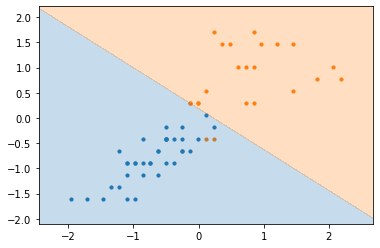

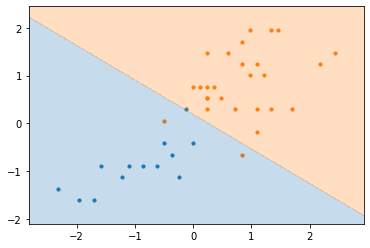

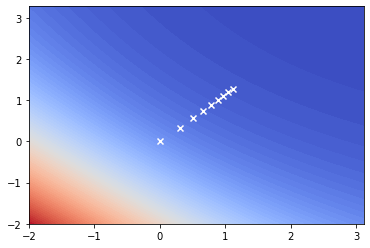

epoch 90, train loss 0.21, train acc 0.93, test loss 0.21, test acc 0.95


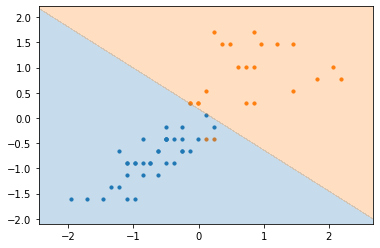

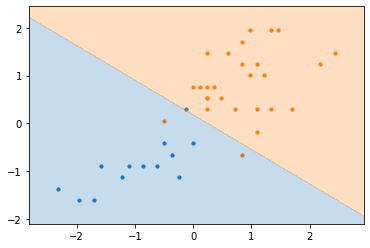

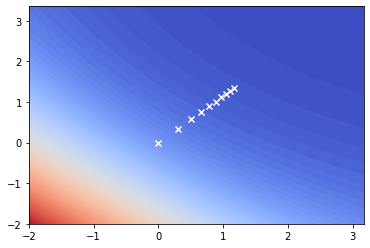

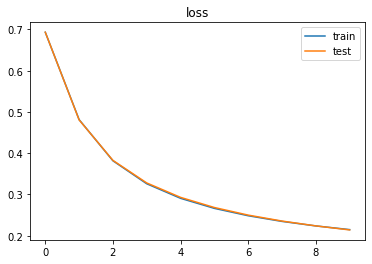

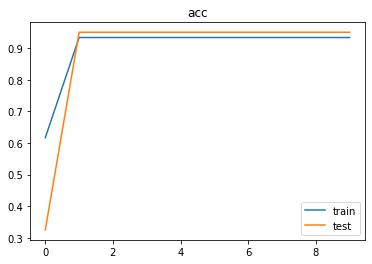

In [12]:
# initialize model and optimizer
model = LogReg()
opt = torch.optim.SGD(model.parameters(), 1e-1)

stats = {
    'train_loss': [],
    'test_loss': [],
    'train_acc': [],
    'test_acc': []
}
weights = []
for epoch in range(100):    
    # forward on train set   
    y_hat_train = model(x_train)
    train_loss = bce(y_train, y_hat_train)
       
    if epoch % 10 == 0:
        # forward on test set and metric computation  
        y_hat_test = model(x_test)
        
        
        test_loss = bce(y_test, y_hat_test)
        
        train_acc = accuracy(y_train, y_hat_train > 0.5)
        test_acc = accuracy(y_test, y_hat_test > 0.5)
        
        print('epoch {}, train loss {:.2f}, train acc {:.2f}, test loss {:.2f}, test acc {:.2f}'.format(
            epoch, train_loss, train_acc, test_loss, test_acc))
        stats['train_loss'].append(train_loss.data.numpy())
        stats['test_loss'].append(test_loss.data.numpy())
        stats['train_acc'].append(train_acc.data.numpy())
        stats['test_acc'].append(test_acc.data.numpy())
        
        weights.append(model.w.data.clone())
        
        plot_decision_regions(x_train, y_train, model)
        plot_decision_regions(x_test, y_test, model)
        plot_loss_surface(x_train, y_train, torch.stack(weights, 0), model.b.data.clone())

    # weight update step
    opt.zero_grad()
    train_loss.backward()
    opt.step()
    
plt.plot(stats['train_loss'], label='train')
plt.plot(stats['test_loss'], label='test')
plt.title('loss')
plt.legend()
plt.show()

plt.plot(stats['train_acc'], label='train')
plt.plot(stats['test_acc'], label='test')
plt.title('acc')
plt.legend()
plt.show()